In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d omkargurav/face-mask-dataset

Dataset URL: https://www.kaggle.com/datasets/omkargurav/face-mask-dataset
License(s): unknown
 99% 162M/163M [00:00<00:00, 827MB/s] 
100% 163M/163M [00:00<00:00, 827MB/s]


In [ ]:
!ls

face-mask-dataset.zip  kaggle.json  sample_data


In [ ]:
from zipfile import ZipFile

with ZipFile('face-mask-dataset.zip','r') as zip:
  zip.extractall()
  print("Done")

Done


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import cv2
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_path = os.listdir('/content/data/with_mask')
print(with_mask_path[:5])
print(with_mask_path[-5:])

['with_mask_1048.jpg', 'with_mask_446.jpg', 'with_mask_3351.jpg', 'with_mask_1652.jpg', 'with_mask_352.jpg']
['with_mask_3189.jpg', 'with_mask_3062.jpg', 'with_mask_394.jpg', 'with_mask_752.jpg', 'with_mask_3221.jpg']


In [ ]:
without_mask_path = os.listdir('/content/data/without_mask')
print(without_mask_path[:5])
print(without_mask_path[-5:])

['without_mask_3689.jpg', 'without_mask_2849.jpg', 'without_mask_3435.jpg', 'without_mask_1835.jpg', 'without_mask_2244.jpg']
['without_mask_2169.jpg', 'without_mask_3751.jpg', 'without_mask_975.jpg', 'without_mask_1768.jpg', 'without_mask_2511.jpg']


In [ ]:
print("num of with mask imges: ", len(with_mask_path))
print("num of without mask imges: ", len(without_mask_path))

num of with mask imges:  3725
num of without mask imges:  3828


labeling the images

with_mask =1
without_mask=0

In [ ]:
with_mask_labels =[1]*3725
without_mask_labels = [0]*3828

In [ ]:
print(with_mask_labels[:5])
print(without_mask_labels[:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [ ]:
labels = with_mask_labels + without_mask_labels

In [ ]:
len(labels)

7553

In [ ]:
print(len(with_mask_labels))
print(len(without_mask_labels))

3725
3828


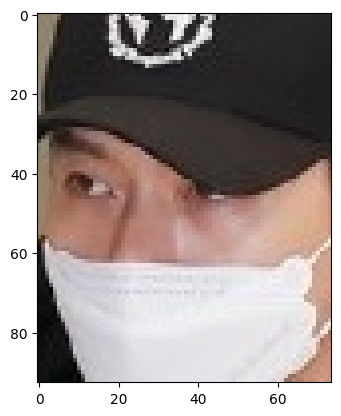

In [ ]:
img = mpimg.imread("/content/data/with_mask/with_mask_584.jpg")
imgplot = plt.imshow(img)
plt.show()

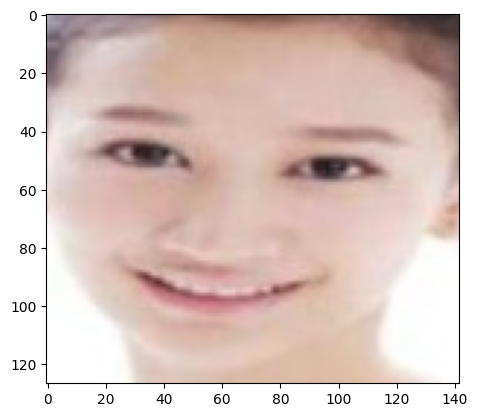

In [ ]:
img = mpimg.imread("/content/data/without_mask/without_mask_3563.jpg")
imgplot = plt.imshow(img)
plt.show()

In [ ]:
img.shape

(127, 142, 3)

In [ ]:
with_mask = '/content/data/with_mask/'

data = []

for img_file in with_mask_path:

  image = Image.open(with_mask + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask = '/content/data/without_mask/'


for img_file in without_mask_path:

  image = Image.open(without_mask + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.12/dist-packages/PIL/Image.py:1047: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
type(data)

list

In [ ]:
len(data)

7553

array([[[ 64,  49,  54],
        [ 65,  50,  55],
        [ 65,  50,  55],
        ...,
        [ 20,  13,  23],
        [ 25,  13,  23],
        [ 26,  14,  24]],

       [[ 65,  50,  55],
        [ 66,  51,  56],
        [ 67,  52,  57],
        ...,
        [ 22,  14,  23],
        [ 26,  14,  24],
        [ 27,  15,  25]],

       [[ 67,  52,  57],
        [ 68,  53,  58],
        [ 69,  54,  59],
        ...,
        [ 23,  15,  23],
        [ 27,  15,  25],
        [ 28,  16,  26]],

       ...,

       [[142, 163, 166],
        [144, 165, 168],
        [146, 167, 170],
        ...,
        [ 55,  45,  53],
        [ 56,  49,  57],
        [ 59,  52,  60]],

       [[141, 163, 166],
        [146, 169, 171],
        [149, 171, 174],
        ...,
        [ 57,  47,  55],
        [ 58,  48,  58],
        [ 58,  49,  58]],

       [[139, 163, 165],
        [146, 170, 172],
        [149, 173, 175],
        ...,
        [ 59,  48,  57],
        [ 60,  48,  58],
        [ 59,  47,  57]]], dtype=uint8)
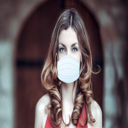

In [ ]:
data[0]

In [ ]:
X = np.array(data)
Y = np.array(labels)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
X_train_scaler = X_train/255
X_test_scaler = X_test/255

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
model = tf.keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation ='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation ='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(2, activation ='sigmoid'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_scaler, Y_train, epochs=10, validation_split=0.1)

Epoch 1/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 153s 875ms/step - accuracy: 0.6922 - loss: 0.7616 - val_accuracy: 0.8694 - val_loss: 0.3537
Epoch 2/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 221s 991ms/step - accuracy: 0.8715 - loss: 0.3474 - val_accuracy: 0.9091 - val_loss: 0.2469
Epoch 3/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 163s 962ms/step - accuracy: 0.9041 - loss: 0.2554 - val_accuracy: 0.9140 - val_loss: 0.2244
Epoch 4/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 190s 890ms/step - accuracy: 0.9275 - loss: 0.1930 - val_accuracy: 0.8942 - val_loss: 0.2295
Epoch 5/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 194s 847ms/step - accuracy: 0.9428 - loss: 0.1659 - val_accuracy: 0.9306 - val_loss: 0.2188
Epoch 6/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 141s 831ms/step - accuracy: 0.9318 - loss: 0.1674 - val_accuracy: 0.9355 - val_loss: 0.2069
Epoch 7/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 141s 824ms/step - accuracy: 0.9426 - loss: 0.1408 - val_accuracy: 0.9124 - val_loss: 0.2921
Epoch 8/10
170/170 ━━━━━━━━━━━━━━━━━━━━ 140s 826ms/step - accuracy: 0.9505 -

In [ ]:
loss, acc  = model.evaluate(X_test_scaler, Y_test)
print("Loss: ", loss)
print("Accuracy: ", acc)

48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 232ms/step - accuracy: 0.9173 - loss: 0.3006
Loss:  0.3146335184574127
Accuracy:  0.9126406311988831


Text(0.5, 0, 'epoch')

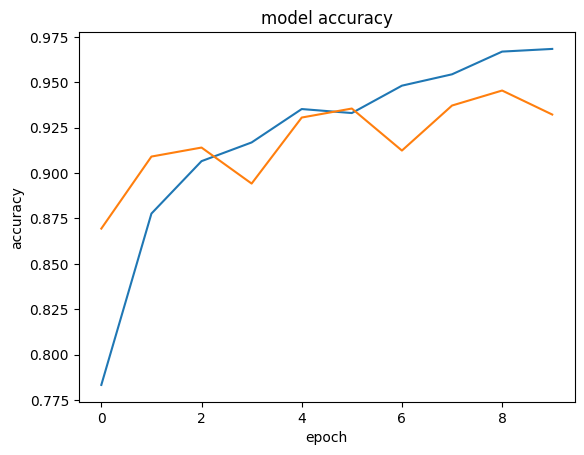

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

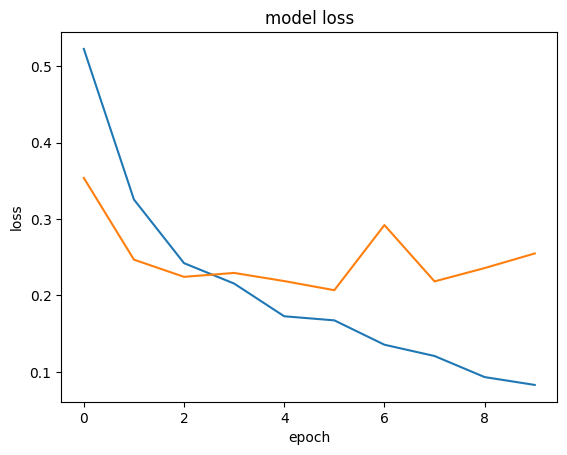

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

In [ ]:
y_pred = model.predict(X_test_scaler)
print(y_pred[:5])

48/48 ━━━━━━━━━━━━━━━━━━━━ 11s 230ms/step
[[6.2277275e-12 9.9999994e-01]
 [9.9994165e-01 5.8281701e-05]
 [8.0441620e-05 9.9991947e-01]
 [9.9998897e-01 1.0965560e-05]
 [3.8361087e-01 6.1638910e-01]]


In [ ]:
input_image = input("Enter the image path: ")

input_image_show = cv2.imread(input_image)
cv2_imshow(input_image_show)
input_image_resize = cv2.resize(input_image_show, (128,128))
input_image_reshape = np.reshape(input_image_resize, [1,128,128,3])
input_image_scaled = input_image_reshape/255
prediction = model.predict(input_image_scaled)
print(prediction)
prediction_label = np.argmax(prediction)
print(prediction_label)

Output hidden; open in https://colab.research.google.com to view.